In [38]:
import numpy as np
from vector_class import TripleVector
import matplotlib.pyplot as plt


# Parameters

In [32]:
A0 = 100 # Bq
Ab = 5 # Bq
h = 10 # m
D_t = 10 # the pause on each point od the grid in s
x_max = 10 # m
y_max = 10 # m

np.linspace(-3, 3, 4)

array([-3., -1.,  1.,  3.])

# Flying over the surface

In [ ]:
from tokenize import Triple

def I(A0, r, D_t):
    return (1 / r**2) * A0 * D_t

def flyOver(source, A0, Ab, D_t, h, x_max, y_max, square):
    if (x_max/square % 2) != 0 or (y_max/square % 2) != 0:
        return "Error: Not valid grid size or division"
    xes = np.linspace(-x_max + square/2, x_max - square/2, int(2*x_max/square))
    grid = np.zeros((1, 2))
    intensities = np.zeros((1, 3))
    i = 1
    y = -3.5
    for x in xes:
        while abs(y) <= y_max:
            drone = TripleVector(x, y, h)
            position = TripleVector(source[0], source[1], 0)
            r_vector = drone - position
            r = r_vector.magnitude()
            row = np.array((x, y, I(A0, r, D_t)))
            intensities = np.vstack((intensities, row))
            grid = np.vstack((grid, np.array((x, y))))
            y += (square)*i
        i = i * (-1)
        y += (square)*i 
    return intensities[1:, :]


flyOver([1.1, 0.5], A0, Ab, D_t, h, 4, 4, 1)


## Visualization

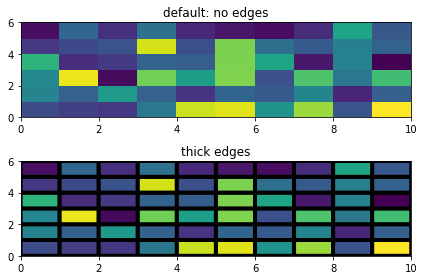

array([[0.23303532, 0.18962555, 0.16796914, 0.40024041, 0.90535818,
        0.93366229, 0.51047011, 0.83735847, 0.26260818, 0.98222066],
       [0.44946774, 0.30882571, 0.53362097, 0.30833827, 0.15707439,
        0.32359922, 0.28012596, 0.4538513 , 0.11203548, 0.30061166],
       [0.45599665, 0.95281179, 0.03428392, 0.77091969, 0.54570466,
        0.79469747, 0.24921058, 0.71180168, 0.39624318, 0.68340873],
       [0.64034023, 0.1327663 , 0.17008387, 0.31960364, 0.29631869,
        0.78935362, 0.57818858, 0.0710189 , 0.44115819, 0.01020514],
       [0.16527809, 0.2256937 , 0.2592289 , 0.91840023, 0.24455477,
        0.79161343, 0.36045393, 0.28349084, 0.43155482, 0.31066127],
       [0.04748259, 0.32540373, 0.14479455, 0.37062884, 0.11905714,
        0.06760735, 0.04089872, 0.12944149, 0.57637557, 0.2757683 ]])

In [41]:
Z = np.random.rand(6, 10)


plt.pcolor(grid, Z)

plt.show()

Z
